# Part 1
### Calculate the wavelength of the light source in the two-slit interference experiment using the information about the physical setup (distance between the slits, distance to the screen) and the illumination pattern at the screen. Use the small angle approximation.
Using a small angle approximation the position of the maxima are described by 
$$d\sin\theta = m\lambda$$
where $d$ is the distance between the slits, $m$ are the numbers of the maxima and $\lambda$ is the wavelength of the source. However, in my case there is an offset, $x_0$ of the central position. Writing $\sin\theta = \frac{x}{D}$ where $x$ is the position along the screen and $D$ is the distance from the slits to the screen. The following expression:
$$x=\frac{\lambda D}{d}m+x_0$$
can be fitted using linear regression and the gradient used to determine the wavelength of the source.

In my experiment $d = 4.57\times10^{-4}$m and $D = 0.495$m.

An uncertainty can be calculated from the line of best fit. Since the uncertainties in d and D are assumed to be negligible $\frac{\Delta \lambda}{\lambda}=\frac{\Delta k}{k}$ where k is the gradient of the line of best fit.

Wavelength is calculated for both the Laser and Light bulb

#### Laser Data
| x (mm)    | m      |
| --------- | ------ |
| 1.90      | -3     |
| 2.55      | -2     |
| 3.26      | -1     |
| 4.00      | 0      |
| 4.75      | 1      |
| 5.47      | 2      |
| 6.10      | 3      |

$\Delta x = 0.025$mm for all points

#### Lamp Data
From average of 5 different measurements at each point

| x (mm)    | m      |
| --------- | ------ |
| 2.40      | -2     |
| 2.90      | -1     |
| 3.50      | 0      |
| 4.10      | 1      |
| 4.70      | 2      |
| 5.30      | 3      |

$\Delta x = 0.05$mm for all points

RESULTS FOR LASER
wavelength = 6.8302669558 +/- 0.070151569 nm
Actual wavelength is 632nm
x0 = 4.00429 +/- 0.01462 mm


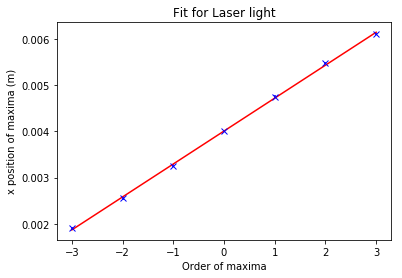

RESULTS FOR LIGHT BULB
wavelength = 5.6204906195 +/- 0.0791461397 nm
Actual wavelength is 550-570nm
x0 = 3.52381 +/- 0.01468 mm


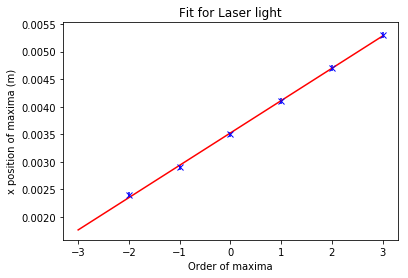

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

d=4.75e-4
D=0.495

def line(m, lamda, x0):
    return lamda*D/d* m + x0

laserx = [1.9e-3,2.55e-3,3.26e-3,4.0e-3,4.75e-3,5.47e-3,6.1e-3] #in SI
laserm = range(-3,4)
lasererrx = np.linspace(0.025e-3,0.025e-3,7)

#fit the straight line to obtain lambda
print "RESULTS FOR LASER"
popt, pcov = curve_fit(line, laserm, laserx, sigma = lasererrx)
print "wavelength =", round(1e7*popt[0],10), "+/-", round(1e7*pcov[0,0]**0.5,10) ,'nm'
print "Actual wavelength is 632nm"
print "x0 =", round(1e3*popt[1],5), "+/-", round(1e3*pcov[1,1]**0.5,5), 'mm'

plt.errorbar(laserm, laserx,yerr=lasererrx, fmt='bx')
points = np.linspace(-3, 3, 500)  # define values to plot the function for
plt.plot(points, line(points, popt[0], popt[1]), 'r')
plt.xlabel('Order of maxima')
plt.ylabel('x position of maxima (m)')
plt.title('Fit for Laser light')
plt.show()


bulbx = [2.4e-3,2.9e-3,3.5e-3,4.1e-3,4.7e-3,5.3e-3] #in SI
bulbm = range(-2,4)
bulberrx = np.linspace(0.05e-3,0.05e-3,6)

#fit the straight line to obtain lambda
print "RESULTS FOR LIGHT BULB"
popt, pcov = curve_fit(line, bulbm, bulbx, sigma = bulberrx)
print "wavelength =", round(1e7*popt[0],10), "+/-", round(1e7*pcov[0,0]**0.5,10) ,'nm'
print "Actual wavelength is 550-570nm"
print "x0 =", round(1e3*popt[1],5), "+/-", round(1e3*pcov[1,1]**0.5,5), 'mm'

plt.errorbar(bulbm, bulbx,yerr=bulberrx, fmt='bx')
points = np.linspace(-3, 3, 500)  # define values to plot the function for
plt.plot(points, line(points, popt[0], popt[1]), 'r')
plt.xlabel('Order of maxima')
plt.ylabel('x position of maxima (m)')
plt.title('Fit for Laser light')
plt.show()

# Part 2
### Simulate the interference pattern for the following three setups. Make a plot of intensity vs. angle over a reasonable range in angle or position on the screen (make a simulated image rather than a line plot if you are feeling ambitious). Do not use the small angle approximation; do neglect diffraction.

#### NOTE: SI units will be used for all of this part
#### NOTE: Intensities plots are given by relative normalised values with an Intensity of 1 corresponding to the maximum intensity seen on the screen for a given pattern.

To calculate the light intensity we need the strength of the electric field at this point.

The electric field of electromagnetic waves varies sinusoidally. The electric field strength drops inversely with distance. Assuming that both waves are linearly polarised with the same direction of polarisation. Hence, the complex representation:
$$E = \frac{E_0}{r} e^{i(\mathbf{k}\cdot\mathbf{r}-\omega t+\phi)}$$

Where $E_0$ is a constant, r is the distance from the source that the field is measured, with corresponding vector ($\mathbf{r}=r\hat{r}$), $\mathbf{k}=\frac{2\pi}{\lambda}\mathbf{k}$, $\mathbf{\omega}=2\pi\nu$, $\nu$ is frequency, $t$ is time and $\phi$ is the starting phase of the wave.

Waves propagate in straight lines hence $\hat{k}=\hat{r}$.

Introducing a second light source means we need to consider the superposition between the light sources to determine the intensity. Intensity is defined as the time average of the Poynting vector
$$I\,\,=\,\,<S>\,\,\,\, \propto \,\,\,\,<(E_1 + E_2)^2>$$

We assume that the waves have equal frequency and wavelength. By substituting the complex representations of $E_1$ and $E_2$ and noting that $e^{i(kr_1-kr_2)}$+$e^{-i(kr_1-kr_2)}=2\cos (kr_1-kr_2)$ we obtain:
$$I=\left(\frac{E_1}{r_1}\right)^{2}+\left(\frac{E_2}{r_2}\right)^{2}+2\frac{E_1E_2}{r_1r_2}\cos (k(r_1-r_2)+\phi_r)$$
where $\phi_r$ is the relative initial phase of the two waves.

In our case we assume that the waves are initially in phase, the only of altering the phase is shifting the pattern on the screen.


## a)
### A 5Ghz wifi signal, with a slit separation of 5m and a distance to the screen of 200m
In this case the angular displacement of a point on the screen is given by
$$\sin\theta=\frac{x}{200}$$
Plots for $I$ vs $\theta$, $I$ vs $x$ and a 2d plot of intensity on the $x-y$ plane are given
Let slits be at (2.5m,0,0) and (-2.5m,0,0) respectively
Point (x,y) on the screen will be given by (x,y,200m)
z-axis is defined as the line from the slits to the screen.

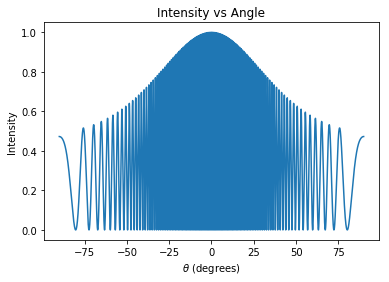

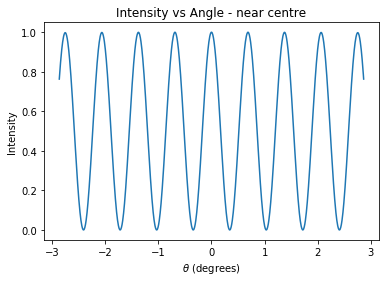

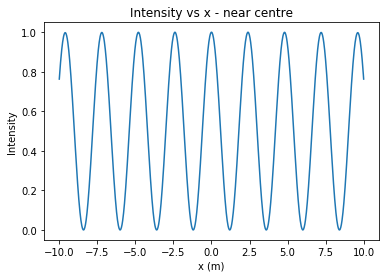

Red corresponds to intensity 1. White corresponds to intensity 0. Lighter shades of red are between 0 and 1


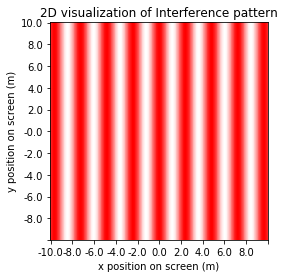

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib as mpl

def Intensity(r1, r2, wavelength, E1, E2, phi):
    k = 2*np.pi/wavelength
    return (E1/r1)**2+(E2/r2)**2 +2*E1*E2*np.cos(k*(r1-r2)+phi)/r1/r2

def distance(x1,y1,z1, x2,y2,z2):
    return np.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)
    
def aIntensity(x,y): #normalised intensity
    dmI = distance(0,0,200,2.5,0.0,0.0) #distance which gives maximum intensity
    Imax = Intensity(dmI,dmI,3.0/50,1,1,0)
    return Intensity(distance(x,y,200,2.5,0.0,0.0),distance(x,y,200,-2.5,0.0,0.0),3.0/50,1,1,0)/Imax

def colour(I):
    return (255,int(255*(1-I)),int(255*(1-I)))

def xtoTheta(x): #in degrees
    return np.arcsin(x/200)*180/np.pi

fig = plt.figure()
points = np.linspace(-200,200,100000)
plt.plot(xtoTheta(points),aIntensity(points,0))
plt.title('Intensity vs Angle')
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel('Intensity')
plt.show()

fig = plt.figure()
points = np.linspace(-10,10,1000)
plt.plot(xtoTheta(points),aIntensity(points,0))
plt.title('Intensity vs Angle - near centre')
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel('Intensity')
plt.show()

fig = plt.figure()
points = np.linspace(-10,10,1000)
plt.plot(points,aIntensity(points,0))
plt.title('Intensity vs x - near centre')
plt.xlabel(r'x (m)')
plt.ylabel('Intensity')
plt.show()

# Creates image
img = Image.new( 'RGB', (500,500), "black") # create a new black image
pixels = img.load() # create the pixel map

def aPixeltoPos(i):
    return 10.0*float(i-250)/250.0

for i in range(img.size[0]):    # for every col:
    for j in range(img.size[1]):    # For every row
        I = aIntensity(aPixeltoPos(i),aPixeltoPos(j))
        #print colour(I)
        pixels[i,j] = colour(I) # set the colour accordingly

#Formats figure and plots
fig = plt.figure()
ax = fig.add_subplot(111)

xlabels = [ aPixeltoPos(i) for i in range(img.size[0])]
ylabels = [ -aPixeltoPos(i) for i in range(img.size[0])]
cax = plt.imshow(img,zorder=0)

def format_x(tick_val, tick_pos):
    if int(tick_val) in range(img.size[0]):
        return xlabels[int(tick_val)]
    else:
        return ''

def format_y(tick_val, tick_pos):
    if int(tick_val) in range(img.size[1]):
        return ylabels[int(tick_val)]
    else:
        return ''   
    
ax.xaxis.set_major_formatter(FuncFormatter(format_x))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(FuncFormatter(format_y))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('2D visualization of Interference pattern')
plt.xlabel('x position on screen (m)')
plt.ylabel('y position on screen (m)')
print 'Red corresponds to intensity 1. White corresponds to intensity 0. Lighter shades of red are between 0 and 1'
plt.show()




## b)
### Electrons moving at $10^{-4}$c, with a slit separation of 1 micron and a distance to the screen of 15m
In this case the angular displacement of a point on the screen is given by
$$\sin\theta=\frac{x}{15}$$
Plots for $I$ vs $\theta$, $I$ vs $x$ and a 2d plot of intensity on the $x-y$ plane are given
Let the slits be at $(-5.0\times10^{-7}m,0,0)$ and $(5.0\times10^{-7}m,0,0)$ respectively.
Point (x,y) on the screen will be given by (x,y,15m) 

The wavelength in this case is the De Broglie wavelength of the electron ($m_e$ is mass of electron, $h$ is Planck's constant, $v$ is speed of electron).
$$\lambda = \frac{h}{m_ev}$$

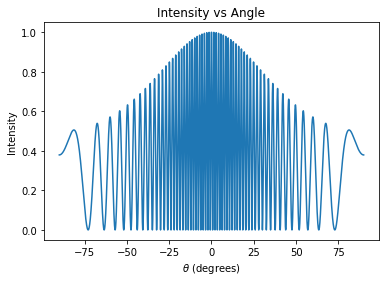

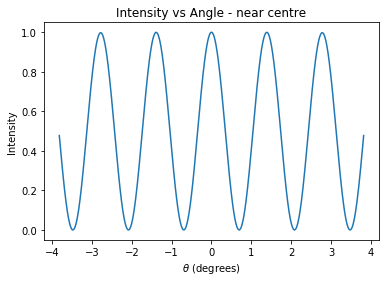

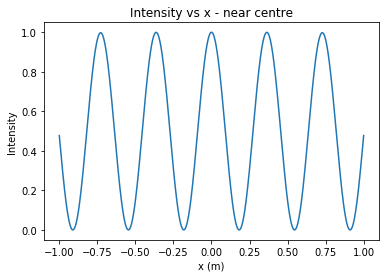

Red corresponds to intensity 1. White corresponds to intensity 0. Lighter shades of red are between 0 and 1


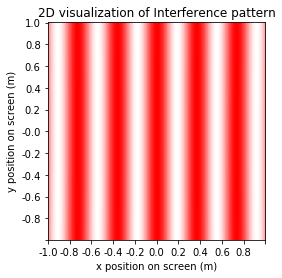

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib as mpl

elambda = 6.62607004/9109.38356/3.0e4

def bIntensity(x,y): #normalised intensity
    dmI = distance(0,0,15,5.0e-7,0.0,0.0) #distance which gives maximum intensity
    Imax = Intensity(dmI,dmI,elambda,1,1,0)
    return Intensity(distance(x,y,15.0,-5.0e-7,0.0,0.0),distance(x,y,15.0,5.0e-7,0.0,0.0),elambda,1,1,0)/Imax

def xtoTheta(x): #in degrees
    return np.arcsin(x/15)*180/np.pi

fig = plt.figure()
points = np.linspace(-15,15,100000)
plt.plot(xtoTheta(points),bIntensity(points,0))
plt.title('Intensity vs Angle')
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel('Intensity')
plt.show()

fig = plt.figure()
points = np.linspace(-1,1,1000)
plt.plot(xtoTheta(points),bIntensity(points,0))
plt.title('Intensity vs Angle - near centre')
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel('Intensity')
plt.show()

fig = plt.figure()
points = np.linspace(-1,1,1000)
plt.plot(points,bIntensity(points,0))
plt.title('Intensity vs x - near centre')
plt.xlabel(r'x (m)')
plt.ylabel('Intensity')
plt.show()

# Creates image
img = Image.new( 'RGB', (500,500), "black") # create a new black image
pixels = img.load() # create the pixel map

def bPixeltoPos(i):
    return float(i-250)/250.0

for i in range(img.size[0]):    # for every col:
    for j in range(img.size[1]):    # For every row
        I = bIntensity(bPixeltoPos(i),bPixeltoPos(j))
        #print colour(I)
        pixels[i,j] = colour(I) # set the colour accordingly

#Formats figure and plots
fig = plt.figure()
ax = fig.add_subplot(111)

xlabels = [ bPixeltoPos(i) for i in range(img.size[0])]
ylabels = [ -bPixeltoPos(i) for i in range(img.size[0])]
cax = plt.imshow(img,zorder=0)

def format_x(tick_val, tick_pos):
    if int(tick_val) in range(img.size[0]):
        return xlabels[int(tick_val)]
    else:
        return ''

def format_y(tick_val, tick_pos):
    if int(tick_val) in range(img.size[1]):
        return ylabels[int(tick_val)]
    else:
        return ''   
    
ax.xaxis.set_major_formatter(FuncFormatter(format_x))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(FuncFormatter(format_y))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('2D visualization of Interference pattern')
plt.xlabel('x position on screen (m)')
plt.ylabel('y position on screen (m)')
print 'Red corresponds to intensity 1. White corresponds to intensity 0. Lighter shades of red are between 0 and 1'
plt.show()

## c
### A 5892 Angstrom laser (like the ones used in telescope adaptive optics systems), with a slit separation of 30 microns and a curved screen. The screen is a section of a vertical cylinder with a radius of curvature of 1.5m. It curves toward the slits and is aligned with the axis of the system, so that its furthest point is 15m from the point midway between the slits.

The set-up is seen in the diagram:
![alt text](https://raw.githubusercontent.com/joelhochstetter/TSI-Assignment/master/Part%203.JPG "Schematic diagram")

This is not to scale and the slits (in green) are at $(-1.5.0\times10^{-5}m,0,0)$ and $(1.5.0\times10^{-5}m,0,0)$.

Using simple trigonometry (cosine and sine rules) the following relationships can be obtained.
$$r=\sqrt{1.5^2+13.5^2+2\cdot1.5\cdot13.5\cos\phi}$$
$$\theta=\sin^{-1}\left(\frac{1.5\sin\phi}{r(\phi)}\right)$$
$$\theta=\sin^{-1}\left(\frac{1.5\sin\phi}{\sqrt{1.5^2+13.5^2+2\cdot1.5\cdot13.5\cos\phi}}\right)$$

In terms of $\phi$ an arbitrary position at height $y$ on the screen is given by $$\left(1.5\sin\phi \,\,\,m, \,\,\,y\,\,\,, (1.5\sin\phi+13.5)\,\,\,m\right)$$

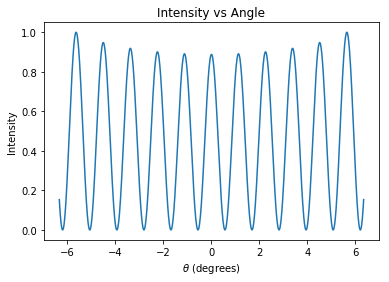

Red corresponds to intensity 1. White corresponds to intensity 0. Lighter shades of red are between 0 and 1


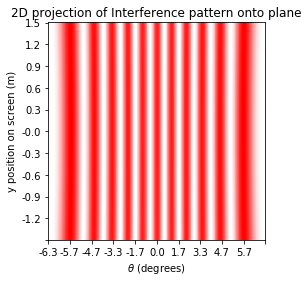

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

wl = 5.892e-7
    
def cIntensityPolar(phi,y): #non-normalised
    return Intensity(distance(1.5*np.sin(phi),y,13.5+1.5*np.cos(phi),-1.5e-5,0.0,0.0),distance(1.5*np.sin(phi),y,13.5+1.5*np.cos(phi),1.5e-5,0.0,0.0),wl,1,1,0)#/Imax

#since it's easier to parameterise distance in terms of phi. Theta is obtained from phi for plotting
#Phi is in radians but theta is in degrees
def getTheta(phi):
    return np.arcsin(1.5*np.sin(phi)/np.sqrt(1.5**2+13.5**2+2*1.5*13.5*np.cos(phi)))*180.0/np.pi

points = np.linspace(-np.pi/2,np.pi/2,1000)
plt.title('Intensity vs Angle')
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel('Intensity')
theta = getTheta(points)
lsInt = cIntensityPolar(points,0)
normFactor = max(lsInt)
lsInt = cIntensityPolar(points,0)/normFactor #Normalisation
plt.plot(theta,lsInt)
plt.show()

# Creates image
img = Image.new( 'RGB', (500,500), "black") # create a new black image
pixels = img.load() # create the pixel map

def cPixeltoPos(i):
    return 1.5*float(i-250)/250.0


for i in range(img.size[0]):    # for every col:
    for j in range(img.size[1]):    # For every row
        I = cIntensityPolar(cPixeltoPos(i),cPixeltoPos(j))/normFactor
        pixels[i,j] = colour(I) # set the colour accordingly

#Formats figure and plots
fig = plt.figure()
ax = fig.add_subplot(111)

xlabels = [ round(getTheta(cPixeltoPos(i)),1) for i in range(img.size[0])]
ylabels = [ -cPixeltoPos(i) for i in range(img.size[0])]
cax = plt.imshow(img,zorder=0)

def format_x(tick_val, tick_pos):
    if int(tick_val) in range(img.size[0]):
        return xlabels[int(tick_val)]
    else:
        return ''

def format_y(tick_val, tick_pos):
    if int(tick_val) in range(img.size[1]):
        return ylabels[int(tick_val)]
    else:
        return ''   
    
ax.xaxis.set_major_formatter(FuncFormatter(format_x))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(FuncFormatter(format_y))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('2D projection of Interference pattern onto plane')
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel('y position on screen (m)')
print 'Red corresponds to intensity 1. White corresponds to intensity 0. Lighter shades of red are between 0 and 1'
plt.show()